## Life expectancy prediction
### This notebook shows the steps to build an ML model to predict life expectancy based on the access to drinking water in a country
The datasets used for this experiment were downloaded from WHO open data. [As defined by the WHO](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/3131) Life expectancy at birth reflects the overall mortality level of a population. It summarizes the mortality pattern that prevails across all age groups - children and adolescents, adults and the elderly. And [Life Expectancy at age 60](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2977) is defined as the average number of years that a person of 60 years old  could expect to live, if he or she were to pass through life exposed to  the sex- and age-specific death rates prevailing at the time of his or her 60 years, for a specific year, in a given country.

### 1. Import the required libraries and Load the datasets
The 1st dataset includes 1.Population using at least basic drinking-water services (%) AND 2.Life expectancy at birth (in years).

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Check the first rows of the 1st dataframe
file_name = 'my_data/water_life_expect_birth.csv'
df_birth = pd.read_csv(file_name, delimiter=',')
df_birth.head()

,Countries,2000_DWU,2001_DWU,2002_DWU,2003_DWU,2004_DWU,2005_DWU,2006_DWU,2007_DWU,2008_DWU,...,2015_DWU,2016_DWU,2017_DWU,2018_DWU,2019_DWU,2020_DWU,2000_LEB,2010_LEB,2015_LEB,2019_LEB
0,Afghanistan,28.0,28.0,30.0,32.0,34.0,36.0,38.0,41.0,43.0,...,61.0,64.0,67.0,70.00000,72.000000,75.000000,55.0,59.9,61.7,63.2
1,Albania,87.0,87.0,87.0,88.0,89.0,89.0,90.0,90.0,90.0,...,93.0,94.0,94.0,94.00000,95.000000,95.000000,73.5,76.2,77.8,78.0
2,Algeria,90.0,90.0,90.0,91.0,91.0,91.0,91.0,92.0,92.0,...,93.0,94.0,94.0,94.00000,94.000000,94.000000,72.2,75.9,76.5,77.1
3,Angola,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,...,54.0,55.0,56.0,57.00000,57.000000,57.000000,49.3,58.1,61.7,63.1
4,Antigua and Barbuda,98.0,98.0,98.0,98.0,98.0,98.0,98.0,97.0,97.0,...,97.0,97.0,97.0,87.40678,87.698864,87.843023,74.6,75.9,76.1,76.5


In [3]:
print(df_birth.columns)

Index(['Countries', '2000_DWU', '2001_DWU', '2002_DWU', '2003_DWU', '2004_DWU',
       '2005_DWU', '2006_DWU', '2007_DWU', '2008_DWU', '2009_DWU', '2010_DWU',
       '2011_DWU', '2012_DWU', '2013_DWU', '2014_DWU', '2015_DWU', '2016_DWU',
       '2017_DWU', '2018_DWU', '2019_DWU', '2020_DWU', '2000_LEB', '2010_LEB',
       '2015_LEB', '2019_LEB'],
      dtype='object')


The 2nd dataset includes 1.Population using at least basic drinking-water services (%) AND 2.Life expectancy at age 60 (in years)

In [4]:
# Check the first rows of the dataframe
file2_name = 'my_data/water_life_expect_sixty.csv'
df_sixty= pd.read_csv(file2_name, delimiter=',')
df_sixty.head()

,Countries,2000_DWU,2001_DWU,2002_DWU,2003_DWU,2004_DWU,2005_DWU,2006_DWU,2007_DWU,2008_DWU,...,2015_DWU,2016_DWU,2017_DWU,2018_DWU,2019_DWU,2020_DWU,2000_LE60,2010_LE60,2015_LE60,2019_LE60
0,Afghanistan,28.0,28.0,30.0,32.0,34.0,36.0,38.0,41.0,43.0,...,61.0,64.0,67.0,70.00000,72.000000,75.000000,13.9,15.1,15.6,15.2
1,Albania,87.0,87.0,87.0,88.0,89.0,89.0,90.0,90.0,90.0,...,93.0,94.0,94.0,94.00000,95.000000,95.000000,19.0,21.3,21.1,21.0
2,Algeria,90.0,90.0,90.0,91.0,91.0,91.0,91.0,92.0,92.0,...,93.0,94.0,94.0,94.00000,94.000000,94.000000,19.8,21.4,21.8,22.0
3,Angola,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,...,54.0,55.0,56.0,57.00000,57.000000,57.000000,14.4,16.0,16.7,17.0
4,Antigua and Barbuda,98.0,98.0,98.0,98.0,98.0,98.0,98.0,97.0,97.0,...,97.0,97.0,97.0,87.40678,87.698864,87.843023,20.3,20.5,20.4,20.6


In [5]:
print(df_sixty.columns)

Index(['Countries', '2000_DWU', '2001_DWU', '2002_DWU', '2003_DWU', '2004_DWU',
       '2005_DWU', '2006_DWU', '2007_DWU', '2008_DWU', '2009_DWU', '2010_DWU',
       '2011_DWU', '2012_DWU', '2013_DWU', '2014_DWU', '2015_DWU', '2016_DWU',
       '2017_DWU', '2018_DWU', '2019_DWU', '2020_DWU', '2000_LE60',
       '2010_LE60', '2015_LE60', '2019_LE60'],
      dtype='object')


### 2. Visualize the data and explore the distribution
We will use the seaborn library to visualize the data


Remember, the objective is to implement a simple ML model to predict what could be the life expectancy (in years) in a country given the percentage of people accessing clean water in that country

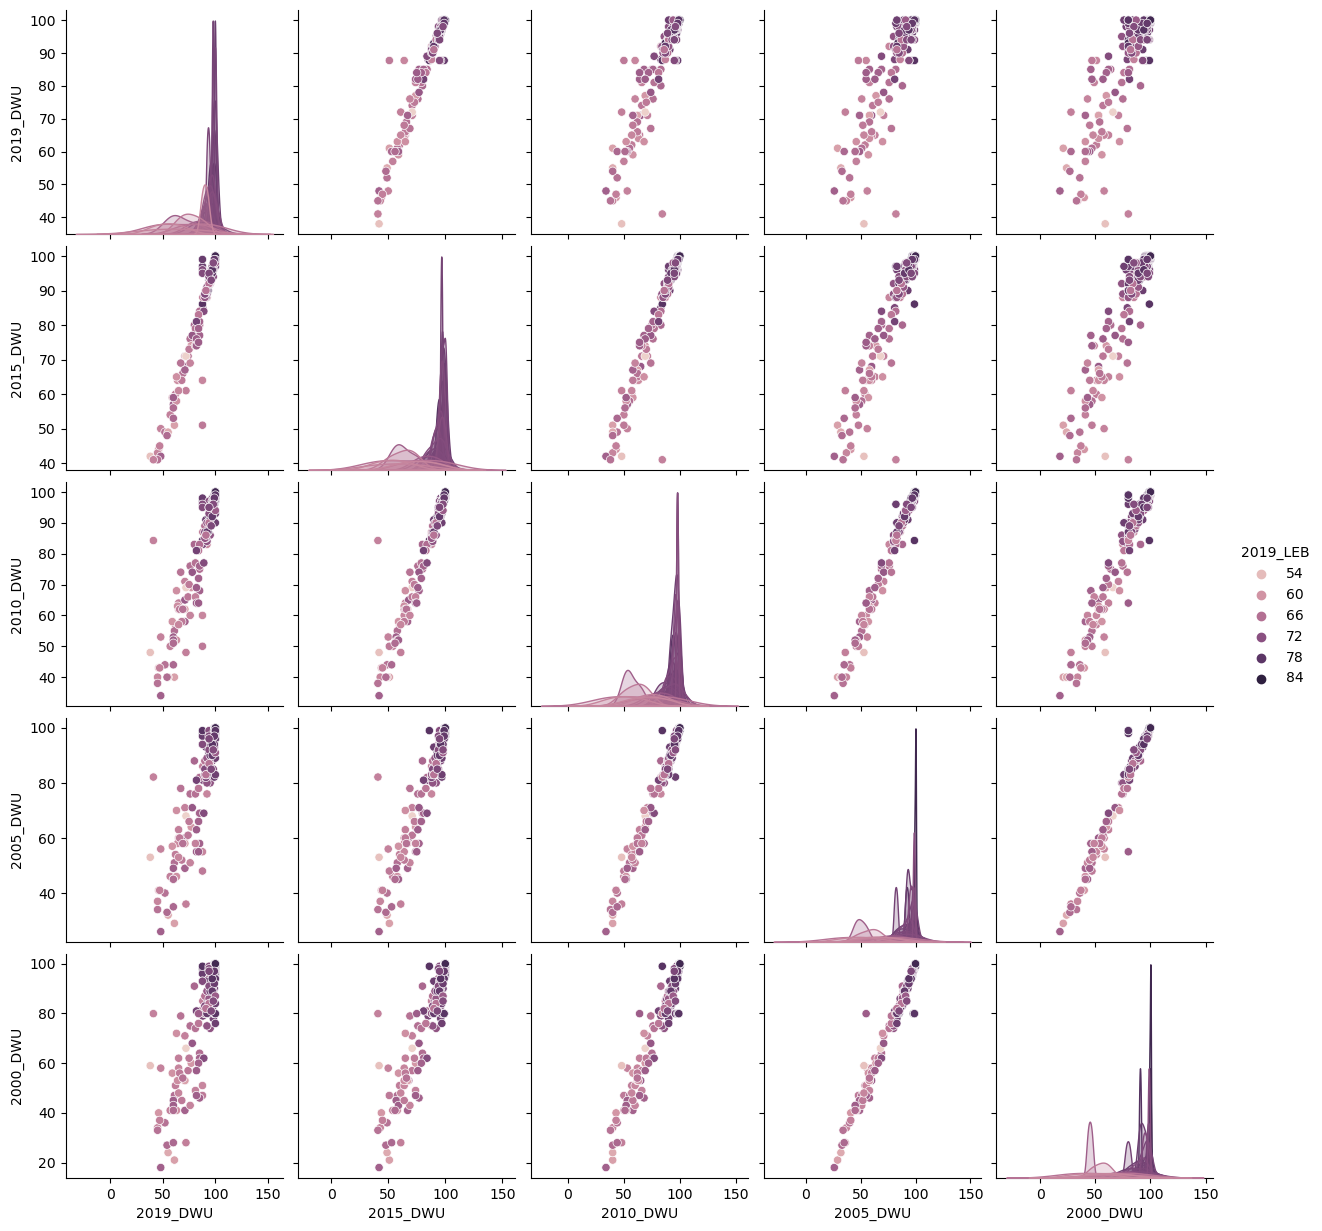

In [6]:
## NOTE that DWU: Drinking Water Usage (in percentage) and LEB: Life Expectancy at Birth (in years)

import seaborn as sns
sns.pairplot(df_birth, hue='2019_LEB', vars=["2019_DWU", "2015_DWU", "2010_DWU", "2005_DWU", "2000_DWU",])

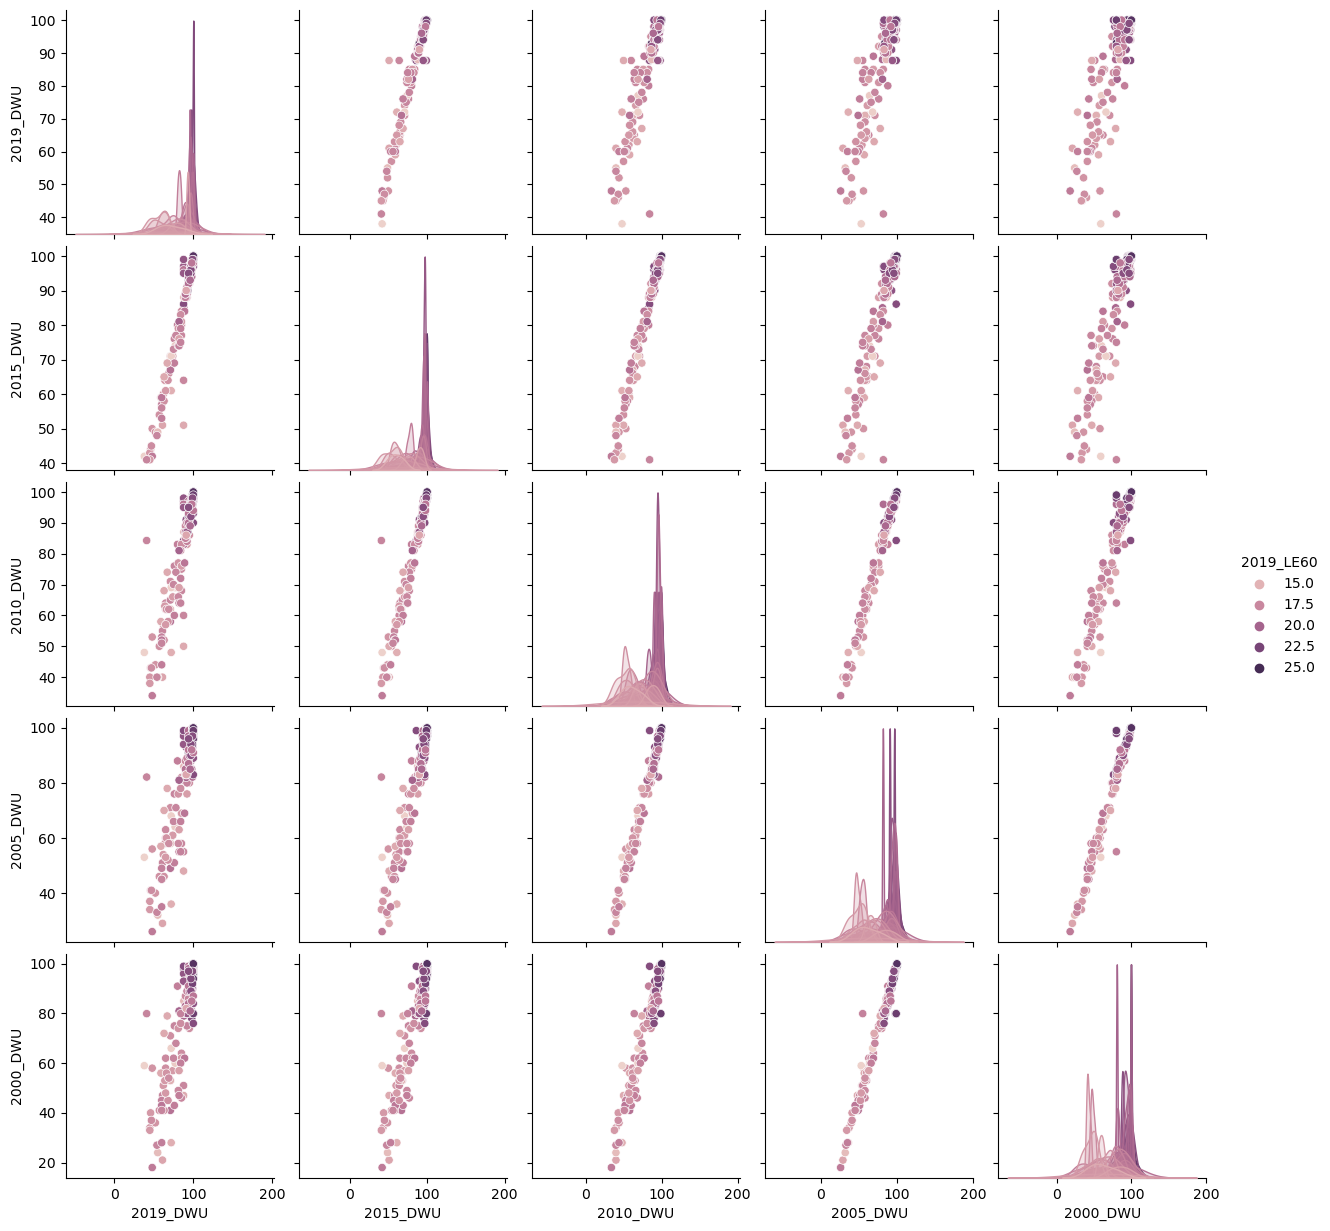

In [7]:
## NOTE that DWU: Drinking Water Usage (in percentage) and LE60: Life Expectancy at age 60 (in years)

import seaborn as sns
sns.pairplot(df_sixty, hue='2019_LE60', vars=["2019_DWU", "2015_DWU", "2010_DWU", "2005_DWU", "2000_DWU",])

### 3. Implement XGboost Regression
Let's now use XGboost Regression to train a classifier on this dataset.

We start by splitting the dataset into a training set and a test set.

The training set will be used to train the model, while the test set will be used to evaluate the performance of the model.

It's important to split the data into a training set and a test set, because the model can overfit on the training set. When the model overfit it is able to achieve almost perfect accuracy on the training set but does not necessarily generalize well to new data and thus performs poorly on the test set. To be able to detect overfitting we always evaluate the model on a separate split of the data that we call the test set that is only used for evaluation purposes and is never used for training.

#### Create the first model to predict life expectancy at birth given the percentage of people accessing clean drinking water

In [9]:
# Split the first dataset  into features (X) and target variable (y)
from sklearn.model_selection import train_test_split

X_birth = df_birth.iloc[:, 1:21].values  # Extract columns 1 to 21 for percentage of people using clean water 
y_birth = df_birth.iloc[:, 21:].values  # Extract columns 22 onwards for life expectancy at birth

# Since y contains multiple columns (4 in this case), let's select a specific column for prediction
target_column = 4  # Select the last column (year 2019) as the target
y_birth = y_birth[:, target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_birth, y_birth, test_size=0.2, random_state=42)

print(y_train)

[81.1 72.  53.1 74.3 77.8 78.3 68.5 74.8 68.4 75.9 80.8 82.6 76.  71.3
 83.4 77.1 73.3 81.3 76.1 76.9 74.  77.  63.8 69.6 77.1 81.8 72.4 67.4
 70.4 75.9 68.1 65.6 70.9 75.8 73.9 73.3 76.  74.  50.7 76.5 59.6 74.7
 81.3 79.6 73.2 73.2 63.3 68.6 63.2 73.2 65.7 75.8 66.3 72.6 69.7 70.1
 78.6 70.4 74.3 62.7 74.3 69.1 83.  81.8 77.9 62.9 69.1 66.1 77.3 65.3
 83.2 65.8 64.1 70.5 73.  65.5 76.4 80.7 79.1 74.3 75.9 73.3 66.6 79.3
 79.9 74.1 64.1 76.6 72.6 63.1 66.7 78.4 82.6 77.4 83.  73.  75.4 84.3
 69.5 76.1 74.2 81.6 76.  82.5 71.5 83.3 63.4 71.9 72.7 75.6 62.8 78.6
 81.7 78.9 63.  71.8 62.5 81.6 72.8 81.  62.2 68.  73.  81.6 64.7 82.4
 81.4 78.  62.2 65.2 77.2 65.3 81.9 65.6 82.  59.4 82.3 73.9 60.7 76.8
 64.1 76.  74.8 76.4 73.7 62.8]


In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost regression model
model_birth = xgb.XGBRegressor()

# Train the model
model_birth.fit(X_train, y_train)

# Make predictions on the test set
y_pred_birth = model_birth.predict(X_test)

# Evaluate the model
mse_birth = mean_squared_error(y_test, y_pred_birth)
r2_birth = r2_score(y_test, y_pred_birth)

# Print the evaluation metrics
print('Mean Squared Error:', mse_birth)
print('R-squared:', r2_birth)

Mean Squared Error: 20.828201275995966
R-squared: 0.6616203981969603


In [25]:
# Save the 1st model to a file
#model_birth.save_model("adult_mort_data/xgb_life_expect_birth.model")

#### Create the second model to predict life expectancy at age 60 given the percentage of people accessing clean drinking water

In [23]:
# Split the second dataset  into features (X) and target variable (y)
from sklearn.model_selection import train_test_split

X_sixty = df_sixty.iloc[:, 1:21].values  # Extract columns 1 to 21 for percentage of people using clean water 
y_sixty= df_sixty.iloc[:, 21:].values  # Extract columns 22 onwards for life expectancy at age 60

# Since y contains multiple columns (4 in this case), let's select a specific column for prediction
target_column = 4  # Select the last column (year 2019) as the target
y_sixty = y_sixty[:, target_column]

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sixty, y_sixty, test_size=0.2, random_state=42)

print(y_train1)

[23.8 20.5 13.2 20.9 21.6 22.1 17.6 18.3 19.  19.4 25.  24.7 20.9 17.9
 25.4 22.  19.  23.6 19.9 20.8 19.5 21.5 16.5 17.9 21.7 24.1 19.2 18.1
 17.8 21.9 16.4 17.3 18.  19.  21.7 19.5 20.4 19.7 13.4 20.6 16.5 19.5
 23.8 22.1 19.9 20.8 17.2 18.1 15.2 20.9 16.6 21.3 17.2 19.1 18.7 17.7
 21.8 17.7 19.9 16.8 19.2 18.  25.  24.2 21.8 17.1 18.1 17.6 21.8 15.7
 25.4 17.8 17.7 17.9 19.5 16.9 20.2 24.3 22.1 20.9 19.6 18.8 17.8 24.3
 24.4 20.3 15.5 21.1 19.  17.  17.7 23.2 24.9 21.1 25.6 18.7 20.5 26.3
 16.1 22.7 20.  24.1 20.9 25.3 18.5 25.8 17.4 18.3 18.7 20.3 17.8 22.
 24.4 22.5 14.7 17.8 16.5 24.2 20.6 24.  16.2 16.2 18.6 24.3 16.4 24.5
 24.1 21.  17.6 15.5 19.5 19.1 24.5 17.2 24.8 13.7 24.6 17.8 15.6 20.2
 16.8 21.8 19.7 20.5 19.6 17.5]


In [26]:
# Create another XGBoost regression model
model_sixty = xgb.XGBRegressor()

# Train the model
model_sixty.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred_sixty = model_birth.predict(X_test1)

# Evaluate the model
mse_sixty = mean_squared_error(y_test1, y_pred_sixty)
r2_sixty = r2_score(y_test1, y_pred_sixty)

# Print the evaluation metrics
print('Mean Squared Error:', mse_sixty)
print('R-squared:', r2_sixty)

Mean Squared Error: 2735.311155971414
R-squared: -275.10744614281595


In [27]:
# Save the 2nd model to a file
#model_sixty.save_model("adult_mort_data/xgb_life_expect_sixty.model")

## Create a gradio interface to interact with the models

In [38]:
import xgboost as xgb
import gradio as gr

# Load the saved models
loaded_model_birth = xgb.XGBRegressor()
loaded_model_sixty = xgb.XGBRegressor()
loaded_model_birth.load_model("adult_mort_data/xgb_life_expect_birth.model")
loaded_model_sixty.load_model("adult_mort_data/xgb_life_expect_sixty.model")

# Define the prediction function
def predict_life_expectancy(percentage_clean_water):
    # Make predictions using both models
    prediction_birth = loaded_model_birth.predict([[percentage_clean_water]])
    prediction_sixty = loaded_model_sixty.predict([[percentage_clean_water]])
    
    return (
        f"{prediction_birth[0]:.2f}",
        f" {prediction_sixty[0]:.2f}"
    )

# Create the Gradio interface
input_text = gr.inputs.Number(label="Percentage of People Accessing Clean Water")
output_text1 = gr.outputs.Textbox(label="Predicted Life Expectancy at Birth (in years)")
output_text2 = gr.outputs.Textbox(label="Predicted Life Expectancy at age 60 (in years)")

interface = gr.Interface(
    fn=predict_life_expectancy,
    inputs=input_text,
    outputs=[output_text1, output_text2],
    layout="vertical"
)

# Launch the Gradio interface
interface.launch()

C:\Users\esspe\.conda\envs\testenv\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\esspe\.conda\envs\testenv\lib\site-packages\gradio\inputs.py:62: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)
C:\Users\esspe\.conda\envs\testenv\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\esspe\AppData\Local\Temp\ipykernel_8816\3621591413.py:26: UserWarning: `layout` parameter is deprecated, and it has no effect
  interface = gr.Interface(


Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.
